In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

## 2.Llamamos los archivos a Google Colab

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


## 3.Hacemos una función para los missing values.

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

#Funcion que hace la media
def clean_mean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)

    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data1 = clean_mean(data)
test = clean_mean(test)

data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

#Funcion que hace la mediana
def clean_median(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)

    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data2 = clean_median(data)
test = clean_median(test)



¿Elegir mediana o media es importante ya que 177 datos son distintos en las edades una vez se corrige los datos faltantes? -> Hacer el modelo con los dos y quedarse con el mejor score

In [ ]:
df_no_missing = sum(data2["Age"]==data1["Age"])
print(len(data2["Age"])-df_no_missing)

177


###Convertimos el sexo y la embarcación en numeros con **Label encoder**

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    data1[col] = le.fit_transform(data[col])
    data2[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

data1
      

['female' 'male']
['C' 'Q' 'S' nan]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


### Convertimos el sexo y embarcación con **One hot Encoding.**

In [ ]:
data1_OHE = pd.get_dummies(data1, columns=['Sex', 'Embarked']) 
data2_OHE = pd.get_dummies(data1, columns=['Sex', 'Embarked'])

##4.Aprendizaje

### Como son datos binarios, utilizamos Logistic Regresión ya que devuelve 1 ó 0. Podriamos utilizar otro tipo de funciones como Tanh, SigmoidLogictic, Sigmoid...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy con media y Label encoder
y = data1["Survived"]
X = data1.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict(X_val)
print("Accuracy con media y Label encoder", accuracy_score(y_val, predictions))



#Accuracy con mediana y Label encoder
y = data2["Survived"]
X = data2.drop("Survived", axis=1)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train2, y_train2)
predictions = clf.predict(X_val2)
print("Accuracy con mediana y Label encoder", accuracy_score(y_val2, predictions))



#Accuracy con media y OneHotEncoder
y = data2_OHE["Survived"]
X = data2_OHE.drop("Survived", axis=1)

X_train2_OHE, X_val2_OHE, y_train2_OHE, y_val2_OHE = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train2_OHE, y_train2_OHE)
predictions = clf.predict(X_val2_OHE)
print("Accuracy con mediana y One Hot encoder", accuracy_score(y_val2_OHE, predictions))



#Accuracy con media y OneHotEncoder
y = data1_OHE["Survived"]
X = data1_OHE.drop("Survived", axis=1)

X_train1_OHE, X_val1_OHE, y_train1_OHE, y_val1_OHE = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train1_OHE, y_train1_OHE)
predictions = clf.predict(X_val1_OHE)
print("Accuracy con media y One Hot encoder", accuracy_score(y_val2_OHE, predictions))

Accuracy con media y Label encoder 0.8100558659217877
Accuracy con mediana y Label encoder 0.8100558659217877
Accuracy con mediana y One Hot encoder 0.8100558659217877
Accuracy con media y One Hot encoder 0.8100558659217877


Tienen exactamente la misma precisión. Por tanto elijo la más simple para crear el modelo predictivo y guardamos los datos en un excel:

In [ ]:
#Accuracy con media y Label encoder
y = data1["Survived"]
X = data1.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict(X_val)
print("Accuracy con media y Label encoder", accuracy_score(y_val, predictions))

#Hacemos un excel con la prediccion de cada pasajero.
submission_preds = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                  })
df.to_csv("submission.csv", index=False)

Accuracy con media y Label encoder 0.8100558659217877


In [ ]:
sub = pd.read_csv("submission.csv")
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


# Resolución por SVM

### Sustituimos de igual manera los datos faltantes

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

X= data.drop(["Survived"],axis=1)
y= data["Survived"]

### Aplicamos One Hot Encoding en vez de Label Encoder porque es mejor para SVM.

In [ ]:
##nos quedamos con las columnas categoricas Sex y embarked para aplicar One Hot Encoding
                            
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [ ]:
from sklearn.utils import resample#Reduce la muestra del dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale#Scala y centra los datos
from sklearn.svm import SVC#Hace SVC para clasificar
from sklearn.model_selection import GridSearchCV#Hace cross validation
from sklearn.metrics import confusion_matrix#Crea esa matriz
from sklearn.metrics import plot_confusion_matrix#dibuja la matriz
from sklearn.decomposition import PCA #Para perfeccionar PCA 

from sklearn.preprocessing import StandardScaler


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

X_train_scaled = scale(X_train) #Center to the mean and component wise scale to unit variance.
X_test_scaled = scale(X_test)

clf_svm = SVC(random_state=42) #Support vector classification
clf_svm.fit(X_train_scaled, y_train)


SVC(random_state=42)

Hago una matriz de confusión para ver cómo de bien se ha ajustado mi modelo con Support Vector Machine

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(223, 11)
(223,)


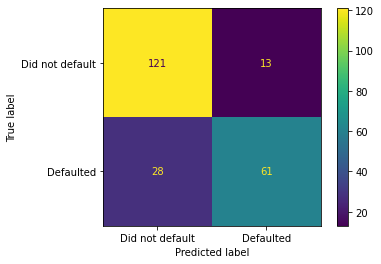

In [ ]:
plot_confusion_matrix(clf_svm,#Modelo
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default','Defaulted'])
print(X_test_scaled.shape)
print(y_test.shape)


**Analizamos confusion matrix**

In [ ]:
Acc = (121+61)/(121+61+28+13) #Metrica que me dice la probabilidad de que prediga correctamente un dato
Err = (28+13)/(121+28+13+61) #Metrica que me dicce la probabilidad de que no prediga correctamente un dato
pre = 121/(121+13) #It can be defined as the number of correct outputs provided by the model or out of all positive classes that have predicted correctly by the model, how many of them were actually true. It can be calculated using the below formula:
Recall = 121/(121+28) # It is defined as the out of total positive classes, how our model predicted correctly. The recall must be as high as possible.

#Si Pre es muy bajo y Recall es muy alto en varios modelos, no lo podemos comparar eficientemente, por lo que se tiene:
Fmeasure = (2*pre*Recall)/(pre+Recall)

print(f"Accuracy: {Acc}")
print(f"Err: {Err}")
print(f"pre: {pre}")
print(f"Recall: {Recall}")

Accuracy: 0.8161434977578476
Err: 0.18385650224215247
pre: 0.9029850746268657
Recall: 0.8120805369127517


Aqui hago CrossValidation dado que me va a dar información de qué método será mejor utilizar; SupportVectorMachine, K-nearest o bien el ya realizado logisticRegression

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

In [ ]:
param_grid = [{'C': [0.5,1,10,100], 'gamma': ['scale', 1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']},]

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_) #Te dice El valor ideal de C Gamma y kernel

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
clf_svm= SVC(random_state=42 , C=10, gamma=0.1)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


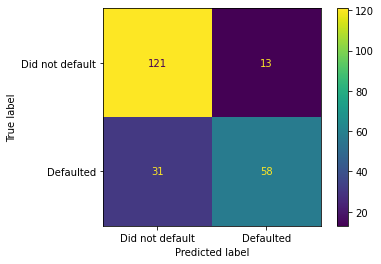

In [ ]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default','Defaulted'])


In [ ]:
len(X.columns) #Contamos el numero de columnas

7

Aquí observamos que PCA es una mala técnica en este caso ya que la segunda columna no se reduce sustancialmente con respecto a la primera y no es mayor que las sucesivas columnas -> Obtendremos mal resultado por PCA.

[22.2 17.7]
['1', '2']


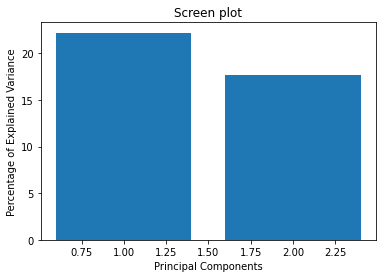

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
print(per_var)
labels = [str(x) for x in range(1,len(per_var)+1)]
print(labels)
plt.bar(x=range(1,len(per_var)+1), height=per_var)


plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen plot')
plt.show()

In [ ]:
print(X_train_pca.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(668, 2)
(668, 11)
(223, 11)
(668,)
(223,)


In [ ]:
train_pc1_coords = X_train_pca[:,0] #contiene los datos en X después de un PCA [_,0] es una manera de pillar toda la columna 0
train_pc2_coords = X_train_pca[:,1] #contiene los datos en Y después de un PCA


#Centramos y escalamos con PCAs
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

#Optimizo el SVM despues de reducir la dimension con PCA

param_grid=[{'C':[1,10,100,1000],'gamma': ['scale', 1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']},]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optimal_params.fit(pca_train_scaled,y_train) #AQUI INTRODUZCO 
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print(X_test_scaled.shape)

(223, 11)


(668, 2)


(668,)
[1 1 1 ... 1 1 1]


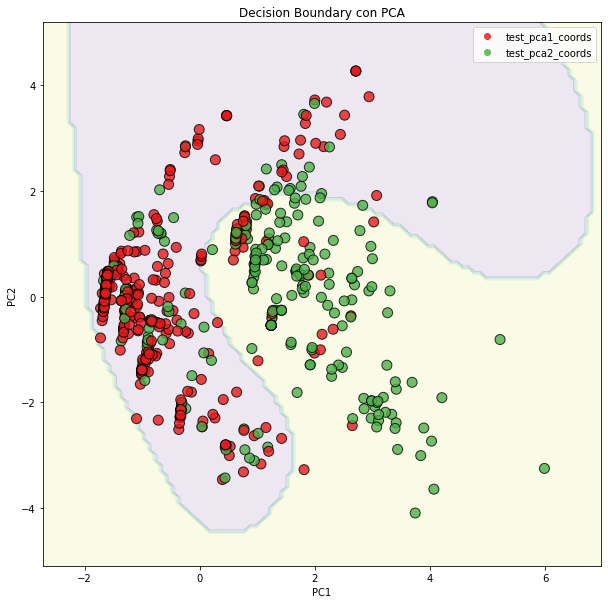

In [ ]:
clf_svm=SVC(kernel= 'rbf',random_state=42,C=10,gamma=0.1)
clf_svm.fit(pca_train_scaled, y_train)

#Transformamos los datos de test con PCA
X_test_pca = pca.transform(X_train_scaled)
test_pca1_coords = X_test_pca[:,0]
test_pca2_coords = X_test_pca[:,1]
print(test_pca2_coords.shape)
#Creamos la matriz para ver las decision boundaries.
x_min = test_pca1_coords.min()-1
x_max = test_pca1_coords.max()+1

y_min = test_pca2_coords.min()-1
y_max = test_pca2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                     np.arange(start=y_min,stop=y_max,step=0.1))

#Clasificamos los puntos de la matriz con SVM. Cerca de la frontera son 0 y lejos son 1
Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
#Ahora  es un array con 1 y 0, que nos dirá como se clasifica.
Z= Z.reshape(xx.shape)
fig,ax=plt.subplots(figsize=(10,10))
#Definimos el contorno de Z, es decir, lo amarillo.
ax.contourf(xx,yy,Z,alpha=0.1)

#Ponemos colores chidos a los puntos
cmap=colors.ListedColormap(['#e41a1c','#4daf4a'])
#Dibujamos los datos. alpha=0.7 nos dice si estamos recubriendo un punto.

scatter= ax.scatter(test_pca1_coords, test_pca2_coords, c=y_train,
                    cmap=cmap,
                    s=100,
                    edgecolors='k',
                    alpha=0.8)
#Creamos una leyenda
legend=ax.legend(scatter.legend_elements()[0],
                 scatter.legend_elements()[1],
                 loc="upper right")

legend.get_texts()[0].set_text("test_pca1_coords")
legend.get_texts()[1].set_text("test_pca2_coords")

#Añadimos los ejes y titulos
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Boundary con PCA')
#plt.savefig('svm_default.png')
plt.show()
#La parte amarilla te dice los default de las personas


In [ ]:
from sklearn.metrics import accuracy_score

## Vamos a realizar el SVM sin PCA.

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

X= data.drop(["Survived"],axis=1)
y= data["Survived"]

##nos quedamos con las columnas categoricas Sex y embarked para aplicar One Hot Encoding
                            
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X_encoded.head()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

X_train_scaled = scale(X_train) #Center to the mean and component wise scale to unit variance.
X_test_scaled = scale(X_test)

clf_svm = SVC(random_state=42) #Support vector classification
clf_svm.fit(X_train_scaled, y_train)

X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
709,3,28.0,1,1,15.2458,0,1,1,0,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1,0
840,3,20.0,0,0,7.9250,0,1,0,0,1,0
720,2,6.0,0,1,33.0000,1,0,0,0,1,0
39,3,14.0,1,0,11.2417,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
880,2,25.0,0,1,26.0000,1,0,0,0,1,0
425,3,28.0,0,0,7.2500,0,1,0,0,1,0
101,3,28.0,0,0,7.8958,0,1,0,0,1,0
199,2,24.0,0,0,13.0000,1,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


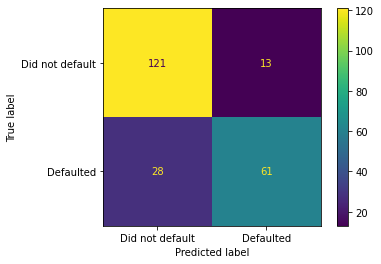

In [ ]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default','Defaulted'])

In [ ]:
#Optimizo el SVM despues de reducir la dimension con PCA

param_grid=[{'C':[1,10,100,1000],'gamma': ['scale', 1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']},]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)

optimal_params.fit(X_train_scaled,y_train) 
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#Con esos parametros, introduzco al entrenamiento de SVC
clf_svm=SVC(kernel= 'rbf',random_state=42,C=10,gamma=0.1)
clf_svm.fit(X_train_scaled, y_train)      


predictions = clf_svm.predict(X_test_scaled)
print("Accuracy con SVM sin PCA", accuracy_score(y_test, predictions)) #más bajo que con LogisticRegression

Accuracy con media y One Hot encoder 0.8026905829596412


# USANDO K-NEAREST

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import resample#Reduce la muestra del dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale#Scala y centra los datos
from sklearn.svm import SVC#Hace SVC para clasificar
from sklearn.model_selection import GridSearchCV#Hace cross validation
from sklearn.metrics import confusion_matrix#Crea esa matriz
from sklearn.metrics import plot_confusion_matrix#dibuja la matriz
from sklearn.decomposition import PCA #Para perfeccionar PCA 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
import os
os._exit(00)

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data



data = clean(data)
test = clean(test)

X= data.drop(["Survived"],axis=1)
y= data["Survived"]


le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

data

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Dibujo el codo de jambú

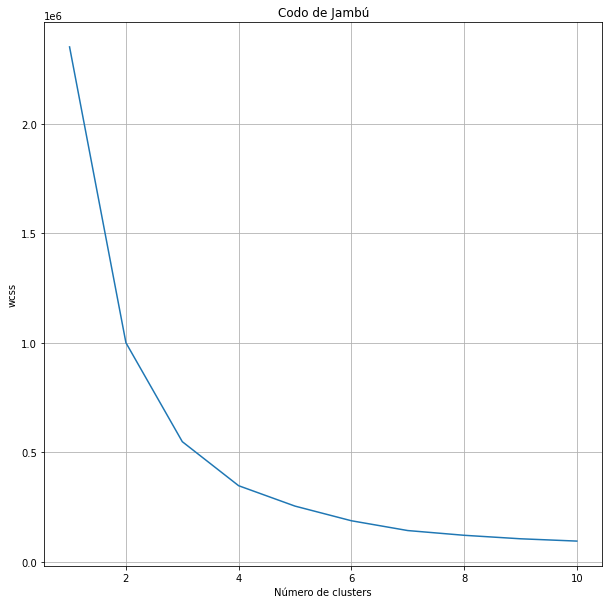

In [ ]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, max_iter=300)
  kmeans.fit(data) #Kmeans se aplica a todo el dataset.
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()


El momento en el que deja de disminuir de manera drástica está entre 3 y 5. Sin embargo, voy a elegir 3.

### Aplicamos el Clustering con k=3

In [ ]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(data)

KMeans(n_clusters=3)

In [ ]:
data["Kmeans_clusters"] = clustering.labels_
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Kmeans_clusters
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0
887,1,1,0,19.0,0,0,30.0000,2,0
888,0,3,0,28.0,1,2,23.4500,2,0
889,1,1,1,26.0,0,0,30.0000,0,0


Voy a usar PCA para hacer una analisis bidimensional al igual que con SVM

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

pca_data = pca.fit_transform(data)
pca_data_df= pd.DataFrame(data = pca_data, columns = ["Componente_1","Componente_2"])
pca_nombres_data=pd.concat([pca_data_df, data[["Kmeans_clusters"]]],axis=1)

pca_nombres_data

,Componente_1,Componente_2,Kmeans_clusters
0,-25.154709,-6.692620,0
1,39.330592,7.590030,2
2,-24.370579,-2.700195,0
3,21.067337,5.089380,2
4,-24.005337,6.295603,0
...,...,...,...
886,-19.265798,-1.813852,0
887,-2.477722,-10.258938,0
888,-8.790645,-1.167774,0
889,-2.282186,-3.262454,0


Represento datos:

<function matplotlib.pyplot.show>

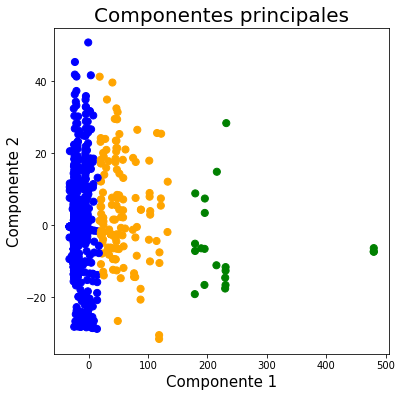

In [ ]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1",fontsize=15)
ax.set_ylabel("Componente 2",fontsize=15)
ax.set_title("Componentes principales",fontsize=20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_nombres_data.Componente_1, y=pca_nombres_data.Componente_2,
           c=color_theme[pca_nombres_data.Kmeans_clusters], s=50)

plt.show

## Aplicamos Kmeans con k=6 sin PCA

Para este caso tenemos que cruzar columnas para ver si nos dan alguna pista de su reagrupación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

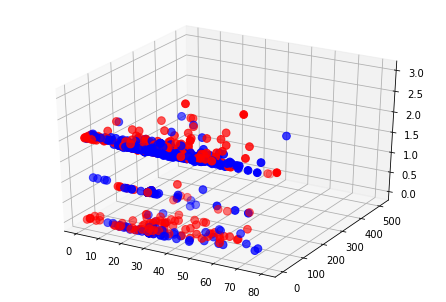

In [ ]:
X = np.array(data[["Age","Fare","Embarked"]]) #Quiero correlacionar estas 3
y = np.array(data['Survived'])

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

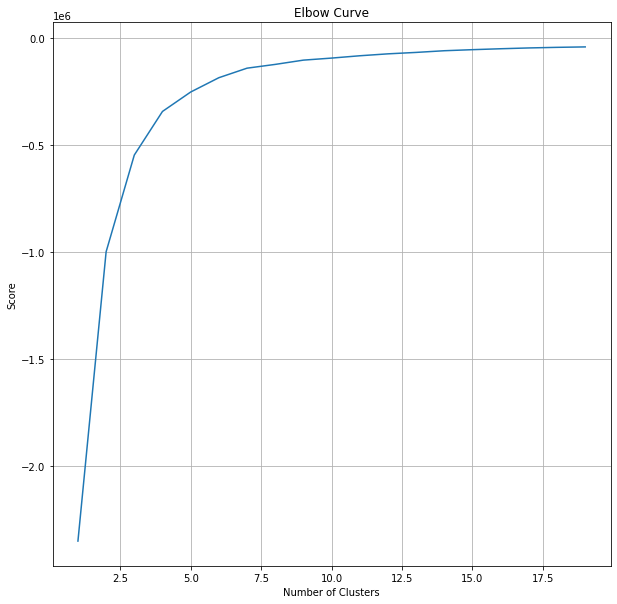

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.figure(figsize=(10,10))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show()



Considero que k=5 con estas columnas es el correcto.

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.82102113e+01 1.47074696e+01 1.61549296e+00]
 [3.20278788e+01 1.31108200e+02 9.69696970e-01]
 [3.53333333e+01 5.12329200e+02 2.22044605e-16]
 [3.00588235e+01 2.38187253e+02 9.41176471e-01]
 [3.48281250e+01 6.51476906e+01 1.37500000e+00]]


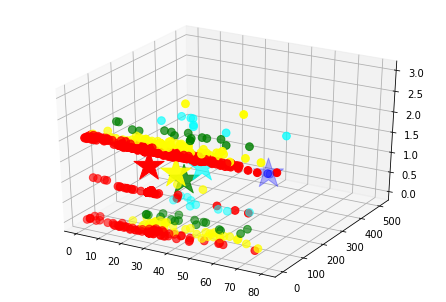

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan',"yellow"]
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Voy a representarlo en 2d

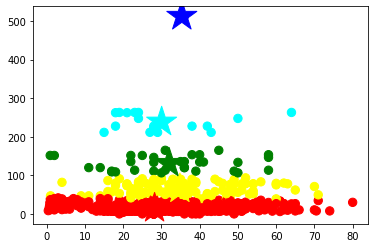

In [ ]:
# Getting the values and plotting it
f1 = data['Age'].values
f2 = data['Fare'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()


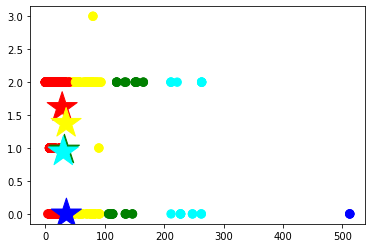

In [ ]:
# Getting the values and plotting it
f1 = data['Fare'].values
f2 = data['Embarked'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

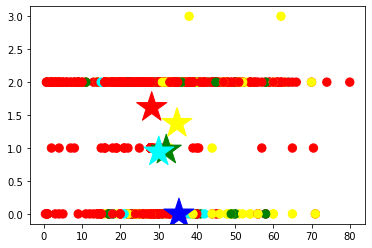

In [ ]:
# Getting the values and plotting it
f1 = data['Age'].values
f2 = data['Embarked'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Aunque ya veo que reagrupar por clusters de tal manera que solo coja 3 columnas en este dataset no tiene mucho sentido, en otros casos podría saber cuantos datos tengo en cada cluster según el color.

In [ ]:

copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo


,color,cantidad
0,red,711
1,green,33
2,blue,3
3,cyan,17
4,yellow,127


# *Resultados*

Hemos obtenido con logistic regresión en los 4 casos la misma precisión e igual a 0.81.

Hemos aprendido a usar dos casos para SVM tal que en el primero hemos realizado PCA graficando tras haber utilizado SVM y en el segundo no hemos realizado PCA y hemos conseguido una precisión de 0.8026. 

Finalmente hemos visto dos casos para Kmeans sin preocuparnos por la precisión, solo por el gozo de ver si había una relacción clara entre los datos. Hemos aprendido a hacer el gráfico de jambú con todo el data set o bien preocupandonos solo por ciertas columnas. En el caso que tengamos todo el dataset, reagrupamos columnas con PCA hasta tener una bidimensionalidad y en el caso de tener 3 columnas, vemos si en el espacio tridimensional forman clusters diferenciados.